In [1]:
## Make figures and draw QTL

In [2]:
## Set file date for use. As of October, 
filedate = 'Dec172018'

In [3]:
## Bring in needed mods
import pandas as pd, os, numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
## Bring in mod, seaborn
import seaborn as sns
sns.set(font_scale=1)
## Set tick style
sns.set(style="ticks", context="talk")
plt.style.use(['tableau-colorblind10'])

In [5]:
## Set coloring and background
#plt.style.use(['dark_background','tableau-colorblind10'])

In [6]:
## Set pat to QTL thresholds should end in, 
## "curation_baselined_median21_AUC_Xstrain_QTL_Thresholds.csv'
thrs_path = '../FILES/Tecan_qtlruns_Oct152018_curated_baselined_median21_AUC_Xstrain_QTL_Thresholds.csv'

In [7]:
## Load QTL threshold dataframe if their is one. 
if thrs_path is not None and os.path.isfile(thrs_path):
    plim = pd.read_csv(thrs_path,index_col=0)
else:
    plim = []

In [8]:
## check its size
len(plim)

9

In [9]:
## set path to file, should in in the words, "curation_baselined_median51_AUC_Xstrain_pvalues.csv'
file_path = '../FILES/Tecan_qtlruns_%s_curated_baselined_median51_AUC_Xstrain_pvalues.csv'%(
    filedate)

In [10]:
## Load QTL results from previous analysis, 
pvaldf = pd.read_csv(file_path,index_col=0)

In [11]:
## Check shape
pvaldf.shape

(92103, 137)

In [12]:
## Check dataframe
pvaldf.head()

,Chrom,Pos,Qual,Callrate,Ref,Alt,Altlen,Dp,Type,Vcfix,...,30C_0.125,30C_0.175,37C_0.0,37C_0.075,37C_0.125,37C_0.175,38C_0.0,39C_0.0,39C_0.075,39C_0.125
0,Chr01,5016,104492.0,1.0,C,A,1,6510,snp,289,...,0.92899,0.655625,0.170498,0.081444,0.516895,0.060467,0.473662,0.078778,0.411585,0.095533
1,Chr01,5299,112647.0,1.0,T,C,1,9711,snp,293,...,0.92899,0.655625,0.170498,0.081444,0.516895,0.060467,0.473662,0.078778,0.411585,0.095533
2,Chr01,5464,112658.0,1.0,T,C,1,9375,snp,294,...,0.92899,0.655625,0.170498,0.081444,0.516895,0.060467,0.473662,0.078778,0.411585,0.095533
3,Chr01,6120,109003.0,1.0,T,C,1,9311,snp,311,...,0.92899,0.655625,0.170498,0.081444,0.516895,0.060467,0.473662,0.078778,0.411585,0.095533
4,Chr01,6166,114638.0,1.0,G,A,1,9269,snp,312,...,0.92899,0.655625,0.170498,0.081444,0.516895,0.060467,0.473662,0.078778,0.411585,0.095533


In [13]:
## Take column names negative one here for not including EBM
pval_cols = [a for a in pvaldf.columns.tolist() if len(a.split('C_0'))>1]

In [14]:
print(pval_cols)

['30C_0.0', '30C_0.075', '30C_0.125', '30C_0.175', '37C_0.0', '37C_0.075', '37C_0.125', '37C_0.175', '38C_0.0', '39C_0.0', '39C_0.075', '39C_0.125']


In [15]:
## create a list of chromosome names
chrlist = pvaldf.Chrom.sort_values().unique()

In [16]:
## Gather the length of each chromosome
clens = [pvaldf[(pvaldf.Chrom==chrom)]['End'].max() 
         for chrom in chrlist]

In [17]:
## Set mid points
chrom_midpts = 0.5 * np.sum(np.array([a 
                    for a in zip([0]+list(np.cumsum(clens)),
                            np.cumsum(clens))]),axis=1)

In [18]:
## Set figure save path
qtl_max = '../FIGURES/' + file_path.split('/')[-1
            ].split('.c')[0] + '_Manhattans_Max.png'

In [19]:
## Set the dpi
mydpi = 100

In [20]:
cumpos = [0] + list(np.cumsum(clens))[:-1]

In [34]:
test_ix = pvaldf['Block'].drop_duplicates().index

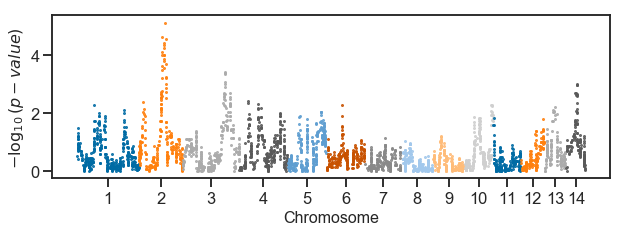

In [44]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
for c, chrom in enumerate(chrlist):
   
    plt.plot(pvaldf[(pvaldf.index.isin(test_ix)) & (pvaldf.Chrom==chrom)].Pos+cumpos[c],
             pvaldf[(pvaldf.index.isin(test_ix)) & (pvaldf.Chrom==chrom)]['37C_0.125'].values,
             '.',alpha=0.85,markersize=4)
    
ax.set_xticks(chrom_midpts);
ax.set_xticklabels([str(i) for i in range(1, len(clens)+1)]);

plt.xlabel('Chromosome',fontsize=16)
plt.ylabel('$-\log_{10}\,(p-value)$',fontsize=16);
fig.savefig('../FIGURES/cdx_37_0.125_auc.png',dpi=150,bbox_inches='tight')

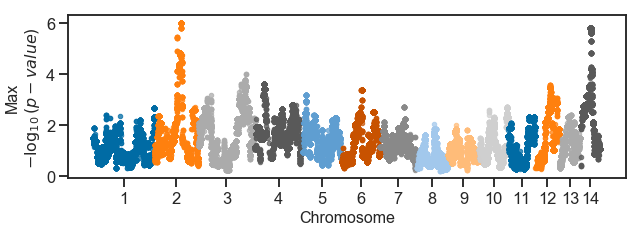

In [63]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
for c, chrom in enumerate(chrlist):
   
    plt.plot(pvaldf[(pvaldf.Chrom==chrom)].Pos+cumpos[c],
             pvaldf[(pvaldf.Chrom==chrom)][pval_cols].max(axis=1),
             '.',alpha=0.75)
    
ax.set_xticks(chrom_midpts);
ax.set_xticklabels([str(i) for i in range(1, len(clens)+1)]);

plt.xlabel('Chromosome',fontsize=16)
plt.ylabel('Max\n$-\log_{10}\,(p-value)$',fontsize=16);
if qtl_max is not None:
    fig.savefig(qtl_max,dpi=mydpi,bbox_inches='tight');

In [64]:
## Set figure save name
qtl_per_pheno = '../FIGURES/' + file_path.split('/')[-1
                        ].split('.c')[0] + '_Manhattans.png'

In [65]:
phenos = pval_cols ## PATCH

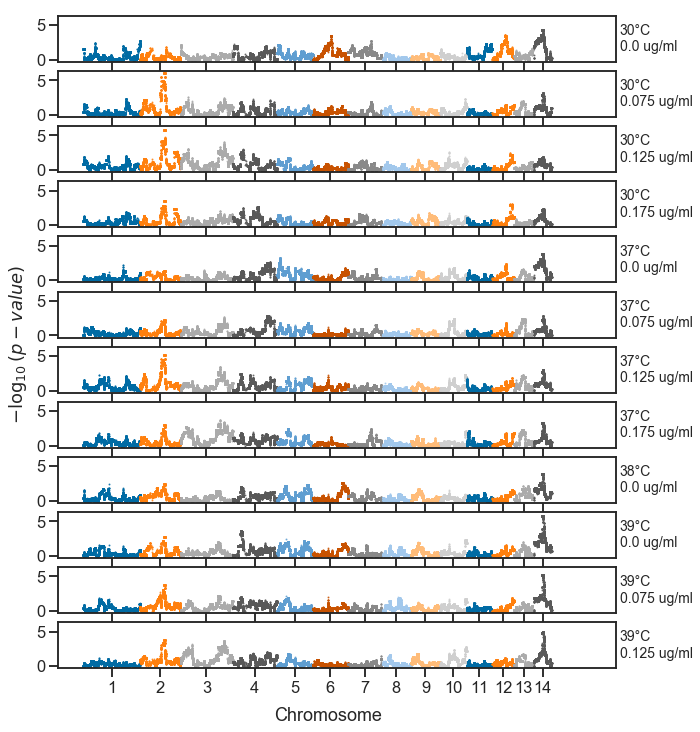

In [79]:
fig, ax = plt.subplots(len(phenos),1,figsize=(10,12),
                       sharex=True,sharey=True)

for p, pheno in enumerate(phenos):
        plt.sca(ax[p])
        ax[p].yaxis.set_label_position("right")
        for c,chrom in enumerate(chrlist):
            temp = pvaldf[(pvaldf.Chrom==chrom)][['Pos',pheno]]
            plt.plot(temp.Pos.values+cumpos[c],temp[pheno],'.',
                     ms=2,alpha=0.75);
        yl = u'°C\n'.join(pheno.split('C_')) + ' ug/ml'
        plt.ylabel(yl,rotation=0,
                   ha='left',va='center',fontsize=14)
        plt.xlabel(' ')

if len(plim) > 0:
    for p, pheno in enumerate(phenos):
        plt.sca(ax[p])
        t,d = pheno.split('C_')
    
        co = plim[(plim.temp==int(t))&
              (plim.amphB==float(d))]['cutoff']
        plt.hlines(co,0,pvaldf.Pos.max()+np.max(cumpos),
               linestyle='--',linewidth=1,alpha=0.9,color='w')
else:
    pass
            
ax[-1].set_xticks(chrom_midpts)
ax[-1].set_xticklabels([str(i) for i in range(1, len(clens)+1)]);
fig.text(0.5,0.07,'Chromosome',fontsize=18,va='center',ha='center');
fig.text(0.07,0.5,"$-\log_{10}\,(p-value)$",
         fontsize=18,va='center',ha='center',rotation=90);
if qtl_per_pheno is not None:
    fig.savefig(qtl_per_pheno, dpi=mydpi,bbox_inches='tight')

In [71]:
## Gather the temperatures
temps = np.unique([a.split('C_')[0] 
                   for a in pval_cols])

In [73]:
## Gather the drug cons
drugs = np.unique([a.split('C_')[-1] 
                   for a in pval_cols])

In [74]:
## Set figure save name
qtl_matrix_pheno = '../FIGURES/' + file_path.split('/')[
    -1].split('.c')[0] + '_Manhattans_Matrix.png'

In [75]:
temps = ['30','37','39']

In [76]:
pheno_map = pd.DataFrame(np.reshape(range(12),(3,4)),index=temps,columns=drugs)

In [77]:
pheno_map

,0.0,0.075,0.125,0.175
30,0,1,2,3
37,4,5,6,7
39,8,9,10,11


In [81]:
pvaldf.End.max()

2295469

In [86]:
plim.cutoff.min()

3.944

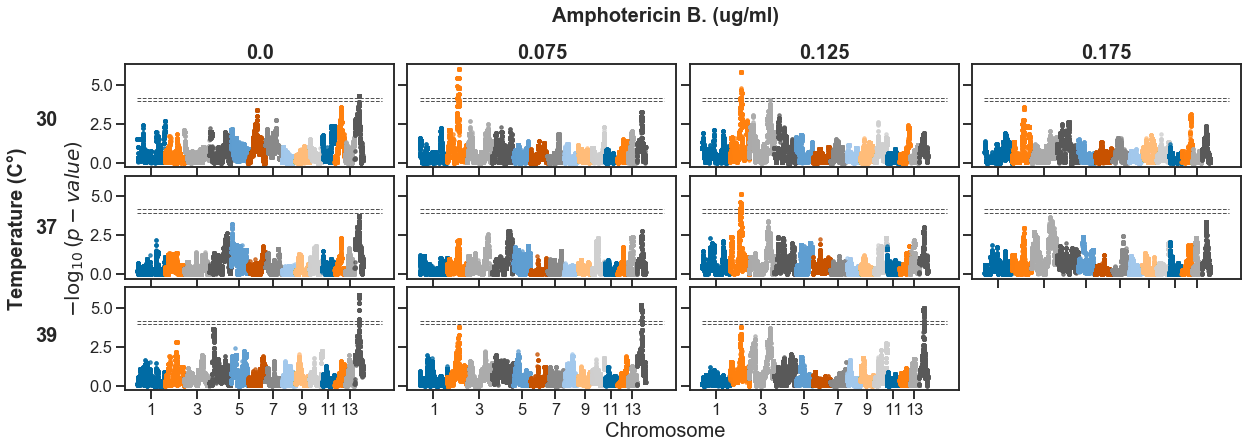

In [88]:
## Make matrix figure of drug x temp
fig, ax = plt.subplots(pheno_map.shape[0],
                       pheno_map.shape[1],
                       figsize=(20,6),
                       sharex=True,sharey=True)
for row in pheno_map.index.tolist():
    for col  in pheno_map.columns.tolist():
        if row+'C_'+col in pvaldf.columns.tolist():
            plt.sca(ax.ravel()[pheno_map[col].T[row]])
            plt.hlines(plim.cutoff.min(),0,
                   pvaldf.End.max()+np.max(cumpos),
                   linestyle='--',linewidth=1,alpha=0.75);
            plt.hlines(plim.cutoff.max(),0,
                   pvaldf.End.max()+np.max(cumpos),
                   linestyle='--',linewidth=1,alpha=0.75);
        
        if row+'C_'+col in pvaldf.columns.tolist():
            for c,chrom in enumerate(chrlist):
                temp = pvaldf[(pvaldf.Chrom==chrom)][['Pos',row+'C_'+col]]
                plt.plot(temp.Pos.values+cumpos[c],
                         temp[row+'C_'+col],'.',ms=7,alpha=0.75);
             #sns.lineplot(x='Cumpos_v',y=row+'C_'+col,
             #data=pvaldf,hue='Chrom',
             #legend=None,palette="colorblind");
            plt.xlabel(' ');plt.ylabel(' ')
        else:
            ax.ravel()[pheno_map[col].T[row]].axis('off')
ax[0,0].set_xticks(chrom_midpts[::2])
ax[0,0].set_xticklabels([str(i) 
                         for i in 
                         range(1,len(clens)+1)[::2]])
for i,t in enumerate(pheno_map.index.tolist()):
    fig.text(0.07,0.75-(0.25*i),u'%s'%(t),
             ha='center',va='center',
              fontsize=20,fontweight='bold');
        
for i,a in enumerate(pheno_map.columns.tolist()):
    plt.sca(ax[0,i])
    plt.title('%s'%(a),y=1.05,
              rotation=0,ha='center',va='center',
              fontsize=20,fontweight='bold');
    
fig.text(0.5,0.03,'Chromosome',
         fontsize=20,va='center',
         ha='center')#,fontweight='bold')

fig.text(0.5,.99,'Amphotericin B. (ug/ml)',
         fontsize=20,va='center',
         ha='center',fontweight='bold')

fig.text(0.05,0.5,u'Temperature (C°)',
         fontsize=20,va='center',ha='center',
         rotation=90,fontweight='bold');

fig.text(0.09,0.5,'$-\log_{10}\,(p-value)$',
         fontsize=20,va='center',ha='center',
         rotation=90)#,fontweight='bold');

plt.subplots_adjust(wspace=0.05,hspace=0.08);
#if len(plim) > 0:    
#    for p, pheno in enumerate(phenos):
#        plt.sca(ax.ravel()[p])
#        t,d = pheno.split('C_')
#        co = plim[(plim.temp==int(t))&
#              (plim.amphB==float(d))]['cutoff']
#        plt.hlines(co,0,pvaldf.Cum_pos_w.max(),
#               linestyle='--',linewidth=1,
#                   alpha=0.9,color='w')
if qtl_matrix_pheno is not None:
    fig.savefig(qtl_matrix_pheno,
                dpi=mydpi,bbox_inches='tight');

In [50]:
ch2peak = pvaldf[(pvaldf.Chrom=='Chr02') & (pvaldf['37C_0.125']>4.1)]
ch2l = ch2peak.Pos_v.min();print(ch2l)
ch2r = ch2peak.Pos_w.max();print(ch2r)
print(ch2r-ch2l)

848749
989618
140869


In [102]:
ch3peakdf = pvaldf[(pvaldf.Block==pvaldf.loc[pvaldf[(pvaldf.Chrom=='Chr03')
                                       ]['30C_0.125'].idxmax(),'Block'])]

In [111]:
print(ch3peakdf.Start.min(),ch3peakdf.End.max())
print(abs(ch3peakdf.Start.min() - ch3peakdf.End.max()))

1767770 1767927
157


In [ ]:

ch2l = ch2peak.Pos_v.min();print(ch2l)
ch2r = ch2peak.Pos_w.max();print(ch2r)
print(ch2r-ch2l)

In [49]:
ch14peak = pvaldf[(pvaldf.Chrom=='Chr14') & (pvaldf['39C_0.125']>4.1)]
ch14l = ch14peak.Pos_v.min();print(ch14l)
ch14r = ch14peak.Pos_w.max();print(ch14r)
print(ch14r-ch14l)

355325
421543
66218


In [32]:
new_pheno_map = pd.DataFrame(np.reshape(range(4),(2,2)),
                             index=['30','37'],columns=['0.0','0.125'])

In [33]:
new_pheno_map

,0.0,0.125
30,0,1
37,2,3


In [34]:
plim

,temp,amphB,cutoff
1,30,0.000,4.139
0,30,0.075,4.033
2,30,0.125,4.074
3,30,0.175,4.130
5,37,0.000,4.098
4,37,0.075,4.160
6,37,0.125,4.069
7,37,0.175,4.080
8,39,0.000,3.944


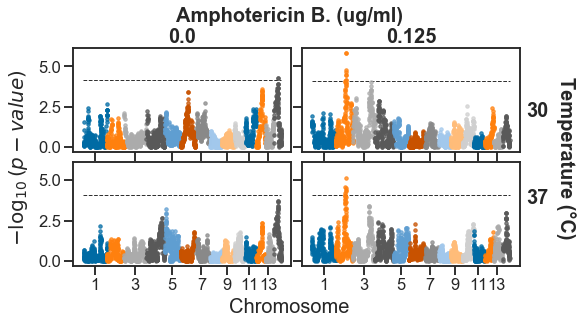

In [35]:
## Make matrix figure of drug x temp
fig, ax = plt.subplots(new_pheno_map.shape[0],
                       new_pheno_map.shape[1],
                       figsize=(8,4),
                       sharex=True,sharey=True)
for row in new_pheno_map.index.tolist():
    for col  in new_pheno_map.columns.tolist():
        plt.sca(ax.ravel()[new_pheno_map[col].T[row]])
        if row+'C_'+col in pvaldf.columns.tolist():
            for chrom in chrlist:
                temp = pvaldf[(pvaldf.Chrom==chrom)][['Cum_pos_w',row+'C_'+col]]
                plt.plot(temp.Cum_pos_w.values,temp[row+'C_'+col],'.',
                     ms=7,alpha=0.75);
             #sns.lineplot(x='Cumpos_v',y=row+'C_'+col,
             #data=pvaldf,hue='Chrom',
             #legend=None,palette="colorblind");
            plt.xlabel(' ');plt.ylabel(' ')
        else:
            ax.ravel()[new_pheno_map[col].T[row]].axis('off')
ax[0,0].set_xticks(chrom_midpts[::2])
ax[0,0].set_xticklabels([str(i) 
                         for i in 
                         range(1,len(clens)+1)[::2]])
for i,t in enumerate(new_pheno_map.index.tolist()):
    fig.text(.93,0.66-(0.3*i),u'%s'%(t),
             ha='center',va='center',
              fontsize=20,fontweight='bold');
        
for i,a in enumerate(new_pheno_map.columns.tolist()):
    plt.sca(ax[0,i])
    plt.title('%s'%(a),y=1.05,
              rotation=0,ha='center',va='center',
              fontsize=20,fontweight='bold');
    
fig.text(0.5,-0.02,'Chromosome',
         fontsize=20,va='center',
         ha='center')#,fontweight='bold')

fig.text(0.5,.99,'Amphotericin B. (ug/ml)',
         fontsize=20,va='center',
         ha='center',fontweight='bold')

fig.text(.98,0.5,u'Temperature (°C)',
         fontsize=20,va='center',ha='center',
         rotation=270,fontweight='bold');

fig.text(0.03,0.5,'$-\log_{10}\,(p-value)$',
         fontsize=20,va='center',ha='center',
         rotation=90)#,fontweight='bold');

plt.subplots_adjust(wspace=0.05,hspace=0.1);
if len(plim) > 0:    
    for row in new_pheno_map.index.tolist():
        for col  in new_pheno_map.columns.tolist():
            plt.sca(ax.ravel()[new_pheno_map[col].T[row]])
        
            co = plim[(plim.temp==int(row))&
              (plim.amphB==float(col))]['cutoff']
            plt.hlines(co,0,pvaldf.Cum_pos_w.max(),
              linestyle='--',linewidth=1,
                   alpha=0.9,color='k')
#if qtl_matrix_pheno is not None:
#    fig.savefig(qtl_matrix_pheno,
#                dpi=mydpi,bbox_inches='tight');
fig.savefig('/Users/croth/Desktop/CROTH_Dissertation_Description/manhattan_plots.png',
           dpi=300,bbox_inches='tight');

In [ ]:
## Make chromosome seperation lines
chrom_seps = [pvaldf[(pvaldf.Chrom==chrom)]['Cum_pos_w'].max() 
              for chrom in chrlist]

In [ ]:
## Gather index to chromosome ends
chrom_ends = [pvaldf[pvaldf.Chrom==chrom].index[0]+1 
              for chrom in chrlist]

In [ ]:
## Manually set positions to place chromosome seperators
ytexts = [0.05,0.16,0.25,0.35,0.44,0.52,0.582,
          0.65,0.72,0.78,0.84,0.89,0.935,0.98]

In [ ]:
## Make chromosome labels
chrom_labels = [str(i+1) for i in range(len(chrlist))]

In [ ]:
## Re name phenotype labels
#phenos = [u'°C '.join(p.split('C_')) + ' ug/ml' 
#                   for p in pval_cols[10:]]

In [ ]:
## append new column names
#new_pval_cols = pval_cols[:pval_ix] + phenos

In [ ]:
## Set new column names
#pvaldf.columns = new_pval_cols + ['EBM']

In [ ]:
## Set figure save name
qtl_heatmap = '../FIGURES/' + file_path.split('/')[
    -1].split('.c')[0] + '_Manhattans_Heat.png'

In [ ]:
## Make heatmap of QTLs across our experients
fig, ax = plt.subplots(1,1,figsize=(25,10));
bar_ax = fig.add_axes([0.125, .02, .3, .04]);

## Make new
new_yticks = [' & '.join(p.split('C_')) 
              for p in phenos]

A = sns.heatmap(pvaldf[phenos].T,cmap="YlGnBu",
                ax=ax,cbar_ax = bar_ax, cbar=True,
                vmax=round(pvaldf[phenos].max().max()),
            vmin=pvaldf[phenos].min().min(),
                cbar_kws={"orientation": "horizontal"},
                yticklabels=new_yticks);

plt.sca(ax)
ax.vlines(chrom_ends[1:], 
          *ax.get_xlim(),color='k',
          linestyle='--',linewidth=1.2);

for c, chrom in enumerate(chrlist):
    plt.text(ytexts[c], -.03,chrom_labels[c], 
             horizontalalignment='center',
                 verticalalignment='center',
             fontweight='bold',fontsize=22,
                 transform = plt.gca().transAxes);
    
for label in ax.get_yticklabels():
    
    label.set_size(20)
    label.set_fontweight('bold');
plt.yticks(rotation=0)
    
bar_ax.tick_params(labelsize=25);
plt.xlabel(' ');

fig.text(0.03,0.5,
         u'Temperature (°C)\n & \nAmphotericin B. (ug/ml)',
         fontsize=25,fontweight='bold',
         rotation=90,va='center',ha='center')

fig.text(0.5,-0.04,'Chromosome',
         fontsize=25,fontweight='bold');

A.set(xticklabels=[])
ax.xaxis.set_visible(False) 
bar_ax.set_xlabel("$-\log_{10}\,(p-value)$",
                  fontsize=24,fontweight='bold')
if qtl_heatmap is not None:
    fig.savefig(qtl_heatmap,dpi=mydpi,
                bbox_inches="tight");

In [ ]:
## Reorder new phenotype order
phenos = np.array(phenos)[list(np.arange(0,12,4)) + 
                 list(np.arange(0,12,4)+1) + 
                 list(np.arange(0,12,4)+2) + 
                 list(np.arange(0,12,4)+3)[:-1]]

## Make heatmap of QTLs across our experients
fig, ax = plt.subplots(1,1,figsize=(25,10));
bar_ax = fig.add_axes([0.125, .02, .3, .04]);

## Make new
new_yticks = [' & '.join(p.split('C_')) 
              for p in phenos]

A = sns.heatmap(pvaldf[phenos].T,cmap="YlGnBu",
                ax=ax,cbar_ax = bar_ax, cbar=True,
                vmax=round(pvaldf[phenos].max().max()),
            vmin=pvaldf[phenos].min().min(),
                cbar_kws={"orientation": "horizontal"},
                yticklabels=new_yticks);

plt.sca(ax)
ax.vlines(chrom_ends[1:], 
          *ax.get_xlim(),color='k',linestyle='--');
for c, chrom in enumerate(chrlist):
    plt.text(ytexts[c], -.03,chrom_labels[c], 
             horizontalalignment='center',
                 verticalalignment='center',
             fontweight='bold',fontsize=22,
                 transform = plt.gca().transAxes);
    
for label in ax.get_yticklabels():
    
    label.set_size(20)
    label.set_fontweight('bold');
plt.yticks(rotation=0)
    
bar_ax.tick_params(labelsize=25);
plt.xlabel(' ');

fig.text(0.03,0.5,
         u'Temperature (°C)\n & \nAmphotericin B. (ug/ml)',
         fontsize=25,fontweight='bold',
         rotation=90,va='center',ha='center')

fig.text(0.5,-0.04,'Chromosome',
         fontsize=25,fontweight='bold');

A.set(xticklabels=[])
ax.xaxis.set_visible(False) 
bar_ax.set_xlabel("$-\log_{10}\,(p-value)$",
                  fontsize=24,fontweight='bold')

if qtl_heatmap is not None:
    fig.savefig(qtl_heatmap.split('.png')[0]+'_drug.png',dpi=mydpi,
                bbox_inches="tight");

In [ ]:
## plot the max vs EBM on chromosome 2
chrom = 'Chr02'
plt.plot(pvaldf[(pvaldf.Chrom==chrom)]['Pos_w'],
         pvaldf[(pvaldf.Chrom==chrom)][phenos].max(axis=1),
         '.',label='max');
plt.plot(pvaldf[(pvaldf.Chrom==chrom)]['Pos_w'],
         pvaldf[(pvaldf.Chrom==chrom)]['EBM'],
         '.',label='ebm');
plt.legend();

In [ ]:
## plot the max vs EBM on chromosome 14
chrom = 'Chr14'
plt.plot(pvaldf[(pvaldf.Chrom==chrom)]['Pos_w'],
         pvaldf[(pvaldf.Chrom==chrom)][phenos].max(axis=1),
         '.',label='max');
plt.plot(pvaldf[(pvaldf.Chrom==chrom)]['Pos_w'],
         pvaldf[(pvaldf.Chrom==chrom)]['EBM'],
         '.',label='ebm');
plt.legend();

In [ ]:
## Figure of all EBM vs max pval
plt.plot(pvaldf.Cum_pos_w,pvaldf[phenos].max(axis=1),'.',alpha=0.76,label='max');
plt.plot(pvaldf.Cum_pos_w,pvaldf['EBM'],'.',alpha=0.76,label='ebm');
plt.legend();